# Data Preparation

## B1: Exploratory Data Analysis

## Step 1: Load and Clean the Data

In [6]:
import pandas as pd
import re

# Load dataset
df = pd.read_csv("imdb_labelled.txt", sep='\t', header=None, names=['sentence', 'label'])

# Basic cleaning
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra whitespace
    return text

df['cleaned_sentence'] = df['sentence'].apply(clean_text)

## Step 2: Check for Unusual Characters

In [9]:
import string

# Characters outside a-z, A-Z, 0-9, and whitespace
unusual_chars = df['cleaned_sentence'].apply(lambda x: re.findall(r"[^a-zA-Z0-9\s]", x))
unusual_counts = unusual_chars.apply(lambda x: len(x)).sum()

print(f"Total unusual characters: {unusual_counts}")

Total unusual characters: 0


## Step 3: Tokenization & Vocabulary Size

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize cleaned text
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_sentence'])

vocab_size = len(tokenizer.word_index) + 1  # +1 for padding
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 3174


## Step 4: Sequence Length Stats

In [17]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_sentence'])

# Get lengths of sequences
sequence_lengths = [len(seq) for seq in sequences]

# Import numpy to get stats
import numpy as np

avg_length = np.mean(sequence_lengths)
std_dev = np.std(sequence_lengths)
max_length = np.max(sequence_lengths)
min_length = np.min(sequence_lengths)
percentile_95 = int(np.percentile(sequence_lengths, 95))

print(f"Average length: {avg_length:.2f}")
print(f"Std Dev: {std_dev:.2f}")
print(f"Min length: {min_length}")
print(f"Max length: {max_length}")
print(f"95th percentile length: {percentile_95}")

Average length: 19.44
Std Dev: 67.12
Min length: 1
Max length: 1384
95th percentile length: 34


## Step 5: Choose Embedding Length

In [20]:
embedding_dim = 100
print(f"Selected embedding length: {embedding_dim}")

Selected embedding length: 100


##  B2: Tokenization Process

## Step 1: Initialize the Tozenizer

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Create tokenizer and fit on cleaned sentences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df["cleaned_sentence"])

## Step 2: View Vocabulary

In [31]:
word_index = tokenizer.word_index
print(f"Number of unique words (vocab size): {len(word_index) + 1}")  # +1 for padding token

Number of unique words (vocab size): 3174


## Step 3: Convert Sentences to Sequences

In [36]:
sequences = tokenizer.texts_to_sequences(df["cleaned_sentence"])
print("Example sequence (first review):")
print(sequences[0])

Example sequence (first review):
[3, 29, 29, 29, 1181, 1182, 13, 37, 3, 1183, 1184, 395, 141]


## B3: Padding Process

## Apply Padding

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define max length from B1
max_length = 34

# Apply post-padding
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Display a padded example
print("Padded example:", padded_sequences[0])

Padded example: [   3   29   29   29 1181 1182   13   37    3 1183 1184  395  141    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


## Single Padded Sequence

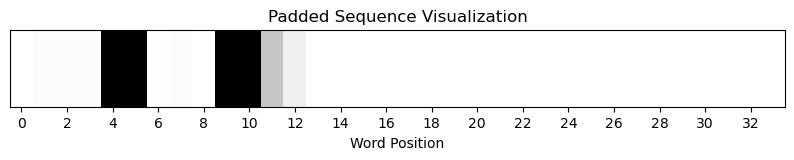

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Use a single padded sequence (example: the first one)
sample_sequence = padded_sequences[0]

# Reshape for visualization (1 row, 34 columns)
sample_array = np.array([sample_sequence])

# Plot
plt.figure(figsize=(10, 1))
plt.imshow(sample_array, cmap='Greys', aspect='auto')
plt.title("Padded Sequence Visualization")
plt.xlabel("Word Position")
plt.yticks([])  # Hide y-axis
plt.xticks(ticks=np.arange(0, len(sample_sequence), 2))  # optional: show every other tick

# Save the image
plt.savefig("padded_sequence_visual.png", bbox_inches='tight')
plt.show()

## B4: Sentiment Categories and Activation Function

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=3174, output_dim=100, input_length=34))  
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid')) 

/Users/trayvoniouspendleton/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## B5: Dataset Preparation and Splitting

In [53]:
from sklearn.model_selection import train_test_split

# Features (padded sequences) and labels
X = padded_sequences
y = np.array(df['label'])  # Ensure labels are in array form

# First split: train vs temp (70/30)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Second split: validation vs test (15/15 split from remaining 30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Confirm shapes
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (523, 34)
Validation set: (112, 34)
Test set: (113, 34)


## B6: Save the Prepared Dataset 

In [56]:
# Save final dataset
prepared_df = pd.DataFrame(X)
prepared_df['label'] = y
prepared_df.to_csv("prepared_imdb_dataset.csv", index=False)

# Network Architecture

## C1: Output of the Model Summary 

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define model
model = Sequential()
model.add(Embedding(input_dim=3174, output_dim=100, input_length=34))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Print summary
model.summary()

/Users/trayvoniouspendleton/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## C3: Hyperparameters

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    Embedding(input_dim=3174, output_dim=100, input_length=34),  # 100-dim word embeddings
    LSTM(64),  # 64 LSTM units
    Dense(1, activation='sigmoid')  # Output for binary classification
])

# Compile the model
model.compile(
    loss='binary_crossentropy',  # Loss function
    optimizer=Adam(),  # Optimizer
    metrics=['accuracy']
)

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Maximum number of epochs
    validation_data=(X_val, y_val),
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/50


/Users/trayvoniouspendleton/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4915 - loss: 0.6944 - val_accuracy: 0.5089 - val_loss: 0.6930
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5527 - loss: 0.6900 - val_accuracy: 0.5089 - val_loss: 0.6920
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5359 - loss: 0.6834 - val_accuracy: 0.5446 - val_loss: 0.6921
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7210 - loss: 0.5253 - val_accuracy: 0.7321 - val_loss: 0.5701
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8559 - loss: 0.3759 - val_accuracy: 0.7143 - val_loss: 0.7327
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9270 - loss: 0.2243 - val_accuracy: 0.7232 - val_loss: 0.7761
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9321 - loss: 0.2100 - val_accuracy: 0.7411 - val_loss: 0.9764


# Neural Network Model Evaluation

## D1: Training Plot

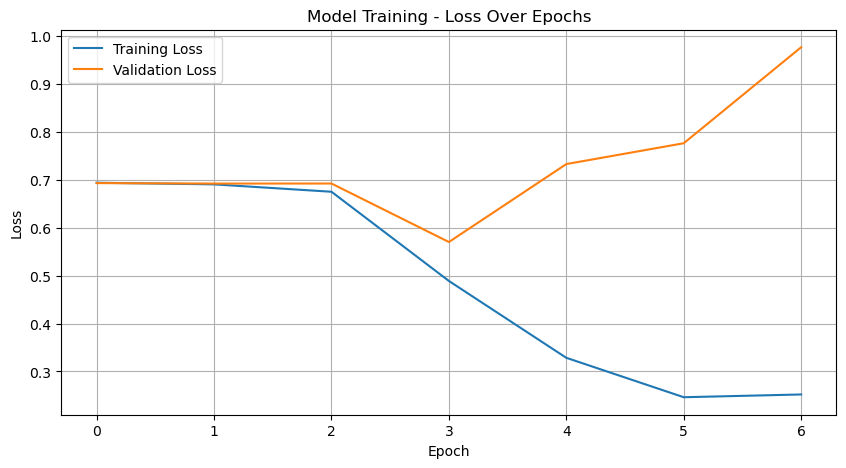

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Training - Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.savefig("final_training_epoch.png")  # Save screenshot
plt.show()

##  D3: Test Set Performance Metrics

In [71]:
# Evaluate the final model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6915 - loss: 0.5979
Test Loss: 0.5950
Test Accuracy: 0.7080


## D3 Visualizations

## Plot training & validation loss values

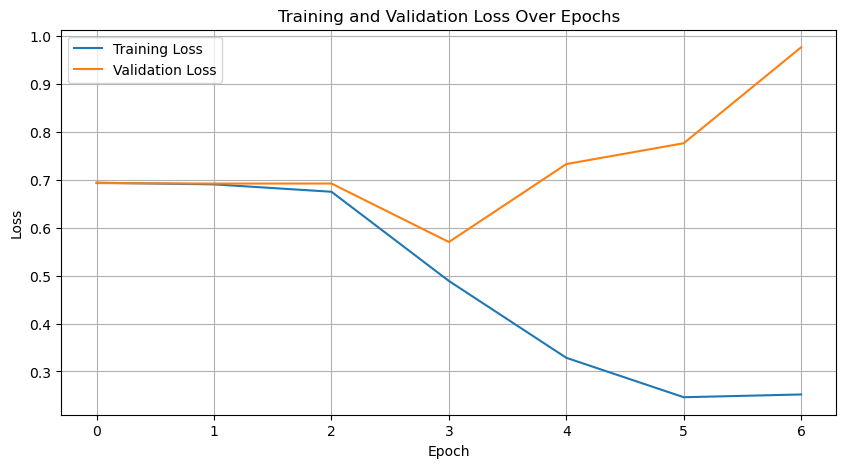

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("loss_plot.png")
plt.show()

## Plot training & validation accuracy values

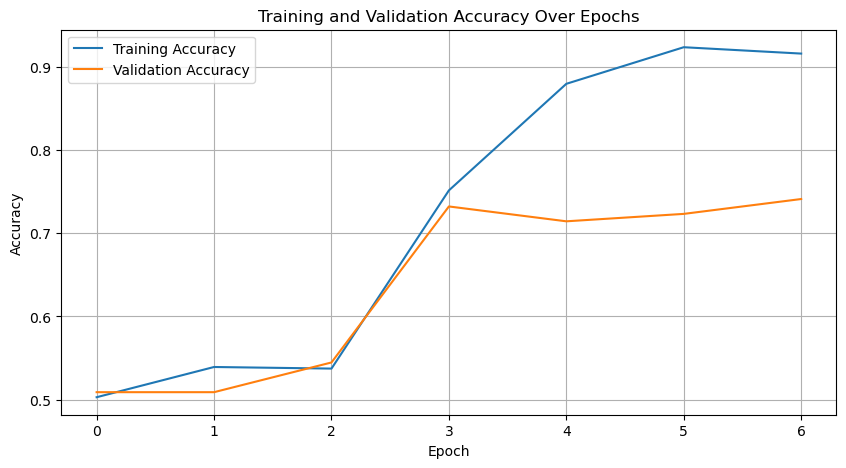

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("accuracy_plot.png")
plt.show()

## E: Code to Save the Trained Model

In [89]:
# Save the trained model
model.save("sentiment_lstm_model.keras")